In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import OrdinalEncoder

In [ ]:
data=pd.read_csv("/content/fpp1215.csv")

In [ ]:
data

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4
...,...,...,...,...,...,...,...
1140,Legumes,Groundnuts,Bag,110,KES12986.00,12/25/2015 12:00:00 AM,1140
1141,Roots & Tubers,Red Irish Potatoes,Bag,110,KES2805.00,12/25/2015 12:00:00 AM,1141
1142,Roots & Tubers,White Irish Potatoes,Bag,110,KES2885.00,12/25/2015 12:00:00 AM,1142
1143,Roots & Tubers,Cassava Fresh,Bag,99,KES2097.00,12/25/2015 12:00:00 AM,1143


Data Preparation:

In [ ]:
data.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


In [ ]:
data.tail()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
1140,Legumes,Groundnuts,Bag,110,KES12986.00,12/25/2015 12:00:00 AM,1140
1141,Roots & Tubers,Red Irish Potatoes,Bag,110,KES2805.00,12/25/2015 12:00:00 AM,1141
1142,Roots & Tubers,White Irish Potatoes,Bag,110,KES2885.00,12/25/2015 12:00:00 AM,1142
1143,Roots & Tubers,Cassava Fresh,Bag,99,KES2097.00,12/25/2015 12:00:00 AM,1143
1144,Roots & Tubers,Sweet Potatoes,Bag,98,KES3067.00,12/25/2015 12:00:00 AM,1144


In [ ]:
data.drop('OBJECTID',inplace=True,axis=1)


In [ ]:
data.isna().sum()
null_data=data.isna()
row_null_data=null_data.any(axis=1)
data[row_null_data]

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
978,Legumes,Groundnuts,Bag,110,NaN,03/01/2015 12:00:00 AM
996,Legumes,Groundnuts,Bag,110,NaN,04/01/2015 12:00:00 AM


In [ ]:
data = data.drop_duplicates()
data.duplicated().values.any()

False

In [ ]:
data.shape

(1145, 6)

In [ ]:
data.dtypes

Produce_Variety    object
Commodity_Type     object
Unit               object
Volume_in_Kgs       int64
Values_in_Ksh      object
Date               object
dtype: object

In [ ]:
data['Volume_in_Kgs'].value_counts()

90     295
13      93
50      93
110     72
126     62
51      55
142     31
38      31
64      31
44      31
39      31
22      31
57      31
93      31
95      31
25      31
54      31
138     31
14      31
115     24
99      24
98      24
Name: Volume_in_Kgs, dtype: int64

In [ ]:
data['Unit'].value_counts()

Bag          780
Ext Bag       86
Med Bunch     62
Lg Box        62
net           62
crate         31
Sm Basket     31
Dozen         31
Name: Unit, dtype: int64

In [ ]:
data['Produce_Variety'].value_counts()

Horticulture      713
Legumes           216
Cereals           120
Roots & Tubers     96
Name: Produce_Variety, dtype: int64

Feature Engineering:

In [ ]:
ord_enc = OrdinalEncoder()
data['produce_variety']=ord_enc.fit_transform(data[['Produce_Variety']]).astype(int)
data['Type_of_Commodity']=ord_enc.fit_transform(data[['Commodity_Type']]).astype(int)
data['Package_Type']=ord_enc.fit_transform(data[['Unit']]).astype(int).astype(int)

In [ ]:
data['package_weight(Kg)']=data['Volume_in_Kgs']

In [ ]:
data['Date']=data['Date'].apply(lambda x: x.split(' ')[0])
data['Day']=data['Date'].apply(lambda x: x.split('/')[1]).astype(int)
data['Month']=data['Date'].apply(lambda x: x.split('/')[0]).astype(int)
data['Year']=data['Date'].apply(lambda x: x.split('/')[2]).astype(int)

In [ ]:
data['Price']=data['Values_in_Ksh'].str.replace('KES'," ").replace(" "," ").astype(float)
data.isna().sum()

Produce_Variety       0
Commodity_Type        0
Unit                  0
Volume_in_Kgs         0
Values_in_Ksh         2
Date                  0
produce_variety       0
Type_of_Commodity     0
Package_Type          0
package_weight(Kg)    0
Day                   0
Month                 0
Year                  0
Price                 2
dtype: int64

In [ ]:
data.isna().sum()
data['Price']=data['Price'].fillna((data['Price'].mean()))

In [ ]:
data.describe()

,Volume_in_Kgs,produce_variety,Type_of_Commodity,Package_Type,package_weight(Kg),Day,Month,Year,Price
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,73.370306,1.251528,20.024454,1.233188,73.370306,2.886463,6.148472,2013.417467,3188.371829
std,36.564162,0.752362,11.773552,2.114043,36.564162,6.461643,3.401301,1.176864,2376.371660
min,13.000000,0.000000,0.000000,0.000000,13.000000,1.000000,1.000000,2012.000000,443.000000
25%,50.000000,1.000000,10.000000,0.000000,50.000000,1.000000,3.000000,2013.000000,1720.000000
50%,90.000000,1.000000,21.000000,0.000000,90.000000,1.000000,6.000000,2013.000000,2610.000000
75%,95.000000,2.000000,30.000000,2.000000,95.000000,1.000000,9.000000,2015.000000,3776.000000
max,142.000000,3.000000,40.000000,7.000000,142.000000,25.000000,12.000000,2015.000000,13713.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 0 to 1144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Produce_Variety     1145 non-null   object 
 1   Commodity_Type      1145 non-null   object 
 2   Unit                1145 non-null   object 
 3   Volume_in_Kgs       1145 non-null   int64  
 4   Values_in_Ksh       1143 non-null   object 
 5   Date                1145 non-null   object 
 6   produce_variety     1145 non-null   int64  
 7   Type_of_Commodity   1145 non-null   int64  
 8   Package_Type        1145 non-null   int64  
 9   package_weight(Kg)  1145 non-null   int64  
 10  Day                 1145 non-null   int64  
 11  Month               1145 non-null   int64  
 12  Year                1145 non-null   int64  
 13  Price               1145 non-null   float64
dtypes: float64(1), int64(8), object(5)
memory usage: 134.2+ KB


In [ ]:
data.columns

Index(['Produce_Variety', 'Commodity_Type', 'Unit', 'Volume_in_Kgs',
       'Values_in_Ksh', 'Date', 'produce_variety', 'Type_of_Commodity',
       'Package_Type', 'package_weight(Kg)', 'Day', 'Month', 'Year', 'Price'],
      dtype='object')

Data Visualization:

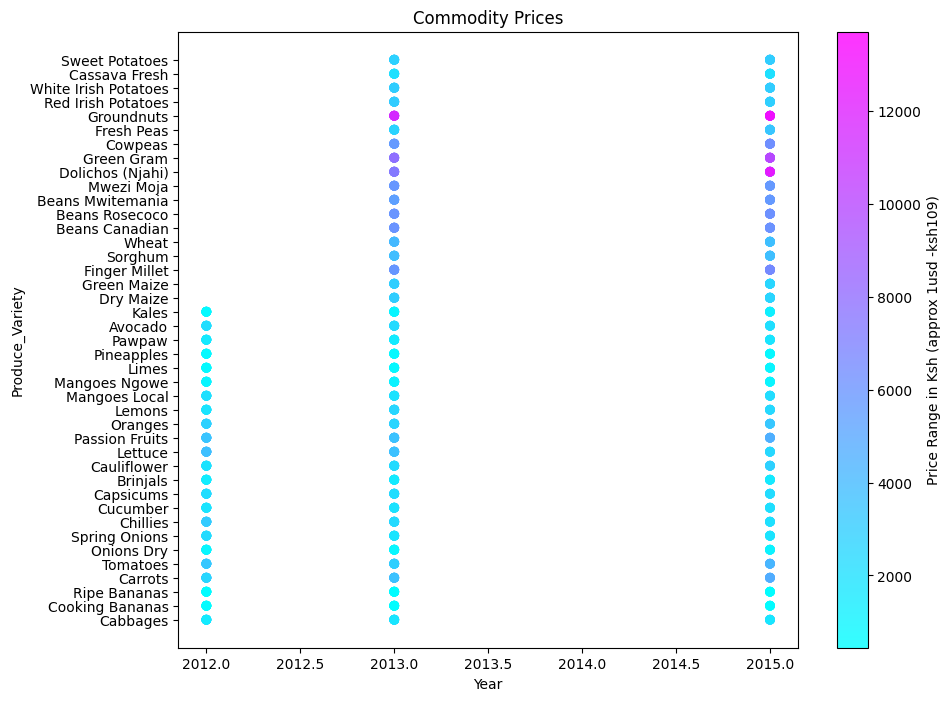

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data['Year'],data['Commodity_Type'],c=data['Price'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Price Range in Ksh (approx 1usd -ksh109)")
plt.title('Commodity Prices')
plt.xlabel('Year')
plt.ylabel('Produce_Variety')
plt.show()

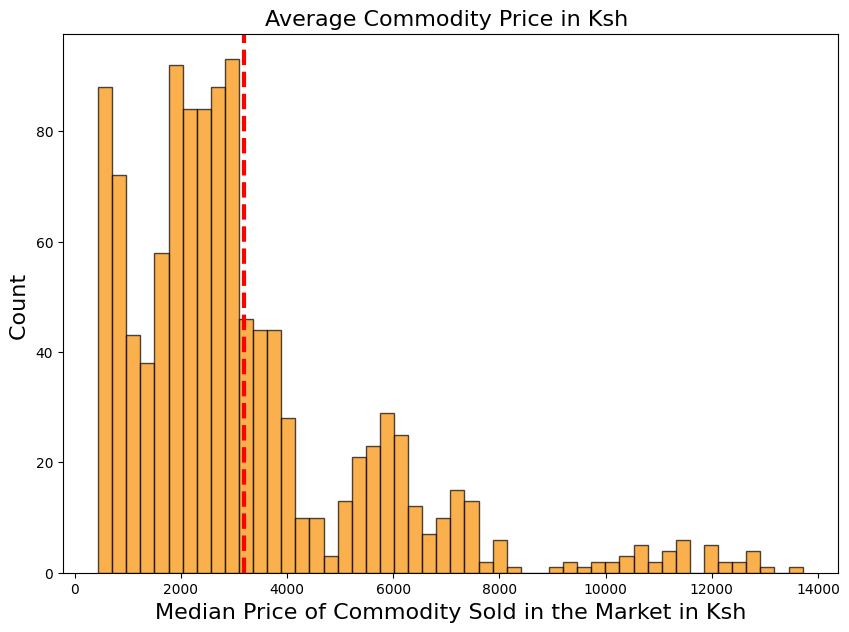

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(data.Price, bins = 50, ec = 'black' ,color = '#f88f01',alpha=0.7)
plt.xlabel('Median Price of Commodity Sold in the Market in Ksh', fontsize=16)
plt.ylabel('Count ', fontsize=16)
plt.title('Average Commodity Price in Ksh ', fontsize=16)
plt.axvline(data['Price'].mean(), color='red', linestyle='dashed', linewidth=3, label='Average Price of Commodity Sold in the Market in Ksh')
plt.style.use('dark_background')
plt.show()

<ipython-input-25-06cd365e2350>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price, bins = 50 ,color = '#f88f01',hist=True)


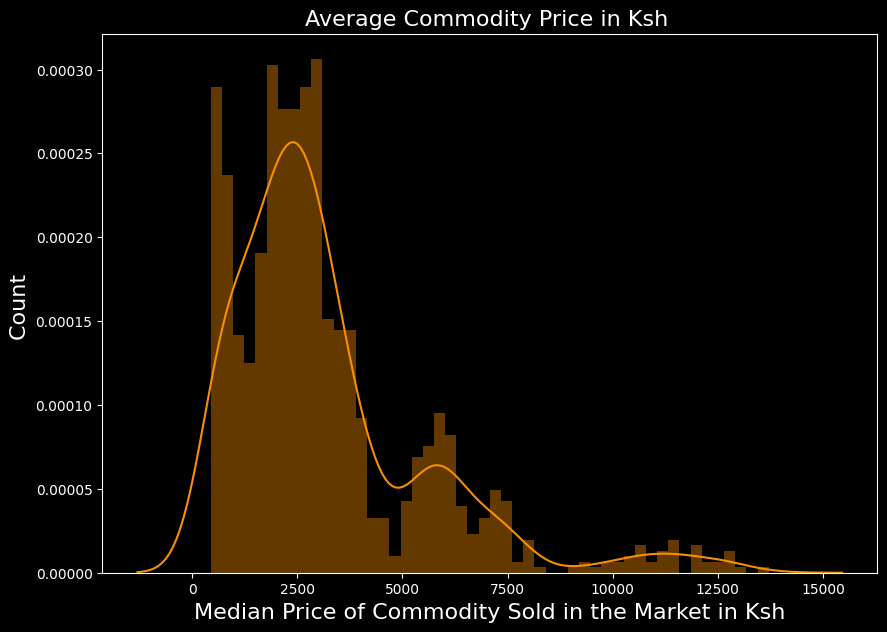

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(data.Price, bins = 50 ,color = '#f88f01',hist=True)
plt.style.use('dark_background')
plt.xlabel('Median Price of Commodity Sold in the Market in Ksh', fontsize=16)
plt.ylabel('Count ', fontsize=16)
plt.title('Average Commodity Price in Ksh ', fontsize=16)
plt.show()

In [ ]:
mean_price=data['Price'].mean()
median_price=data['Price'].median()
print('The mean commodity Price is Ksh',round(mean_price))
print('The median commodity Price is Ksh',median_price)

The mean commodity Price is Ksh 3188
The median commodity Price is Ksh 2610.0


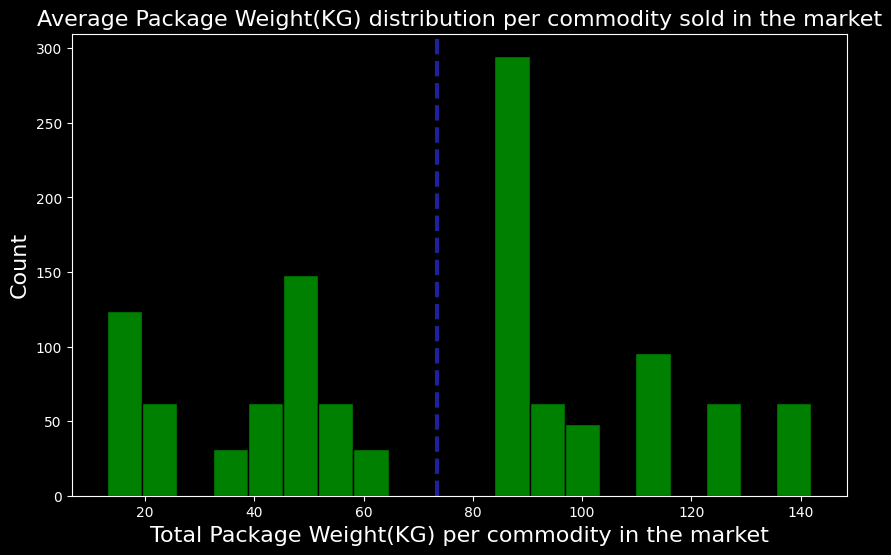

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['package_weight(Kg)'], bins=20, ec = 'black', color = 'green')
plt.xlabel('Total Package Weight(KG) per commodity in the market', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Average Package Weight(KG) distribution per commodity sold in the market', fontsize=16)
plt.axvline(data['package_weight(Kg)'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Households in a block')
plt.show()
plt.style.use('dark_background')

In [ ]:
mean_pack_weight=data['package_weight(Kg)'].mean()
print('The mean package_weight in KG is:',mean_pack_weight)
mean_pack_median=data['package_weight(Kg)'].median()
print('The median package_weight in KG is:',mean_pack_median)

The mean package_weight in KG is: 73.37030567685589
The median package_weight in KG is: 90.0


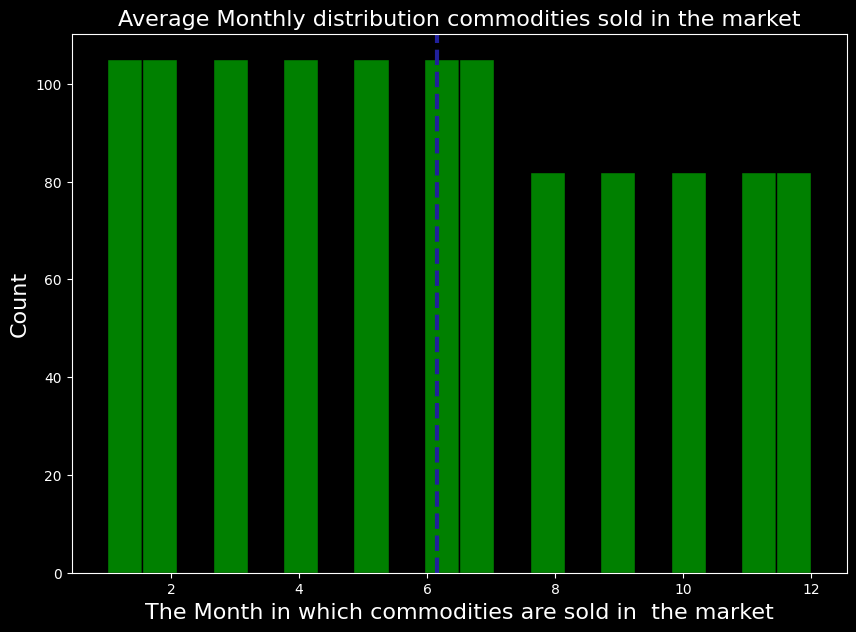

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(data['Month'], bins=20, ec = 'black', color = 'green')
plt.xlabel('The Month in which commodities are sold in  the market', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Average Monthly distribution commodities sold in the market', fontsize=16)
plt.axvline(data['Month'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Monthly distribution commodities sold in the market')
plt.show()
plt.style.use('dark_background')

<Axes: >

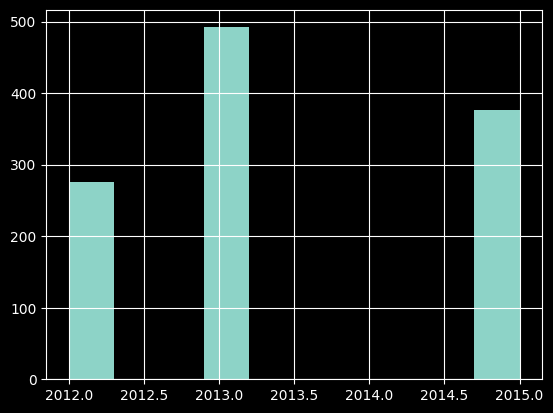

In [ ]:
data.Year.hist()

<Axes: >

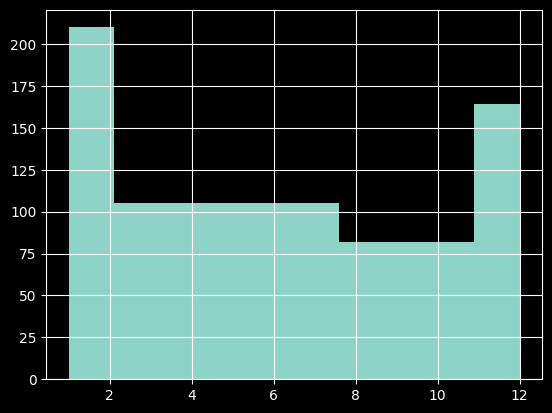

In [ ]:
data.Month.hist()

<Axes: >

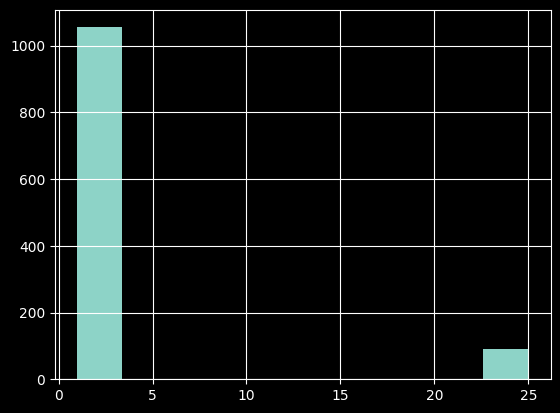

In [ ]:
data.Day.hist()

In [ ]:
data['Produce_Variety'].value_counts()

Horticulture      713
Legumes           216
Cereals           120
Roots & Tubers     96
Name: Produce_Variety, dtype: int64

<Axes: >

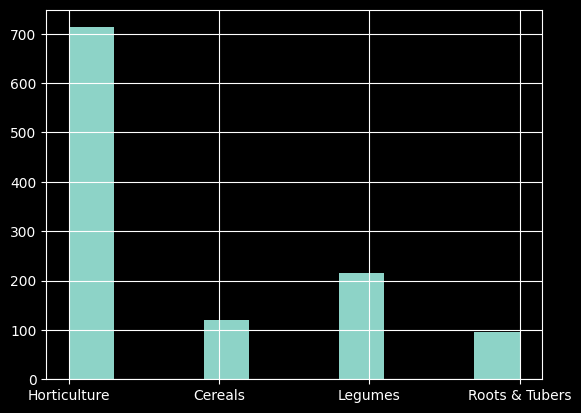

In [ ]:
data.Produce_Variety.hist()

Correlation:

In [ ]:
data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr()

,produce_variety,Type_of_Commodity,Package_Type,package_weight(Kg),Day,Month,Year,Price
produce_variety,1.000000,-0.033852,-0.221569,0.205566,0.161232,0.034582,0.165628,0.292545
Type_of_Commodity,-0.033852,1.000000,0.117949,-0.055400,-0.006122,-0.001313,-0.006289,-0.172771
Package_Type,-0.221569,0.117949,1.000000,-0.555234,-0.155093,-0.033266,-0.159322,-0.411439
package_weight(Kg),0.205566,-0.055400,-0.555234,1.000000,0.160867,0.034504,0.165253,0.418381
Day,0.161232,-0.006122,-0.155093,0.160867,1.000000,0.330882,0.392926,0.259159
Month,0.034582,-0.001313,-0.033266,0.034504,0.330882,1.000000,-0.139098,0.045978
Year,0.165628,-0.006289,-0.159322,0.165253,0.392926,-0.139098,1.000000,0.299783
Price,0.292545,-0.172771,-0.411439,0.418381,0.259159,0.045978,0.299783,1.000000


In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: >

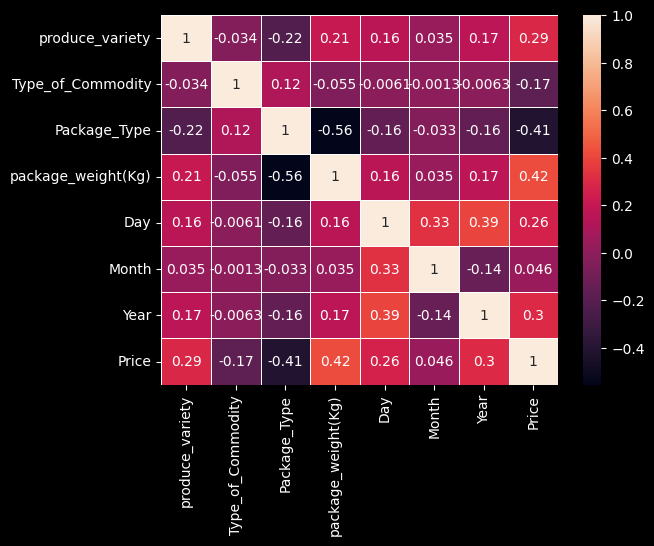

In [ ]:
cmap = sns.diverging_palette(200,10, as_cmap=True)
sns.heatmap(data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr(),annot=True, annot_kws={"size": 10},linewidths=.7)

In [ ]:
mask = np.zeros_like(data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

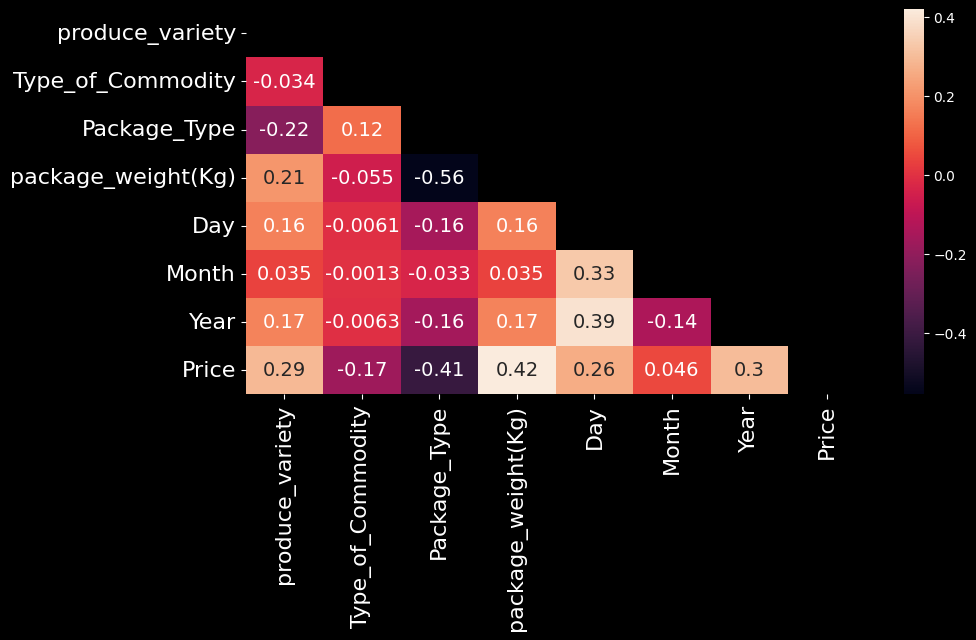

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']].corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.style.use('dark_background')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/cleaned.csv")

In [ ]:
data_model=data[['produce_variety','Type_of_Commodity','Package_Type','package_weight(Kg)','Day','Month','Year','Price']]

In [ ]:
data_dum=pd.get_dummies(data_model)

In [ ]:
X=data_dum.drop('Price',axis=1)
y=data_dum['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

-679962.8667482652


In [ ]:
test_pred=model.predict(X_test)
test_train=model.predict(X_train)

In [ ]:
residuals=test_pred-y_test
residuals

811   -2449.237447
601    2414.131789
176    1317.493408
247      24.038594
532    -267.357952
          ...     
876     493.467871
544    1963.606455
164    -135.963732
865   -1827.952116
40      -41.817399
Name: Price, Length: 344, dtype: float64

(array([  6.,   2.,   3.,  10.,  20.,  70., 104.,  99.,  26.,   4.]),
 array([-8010.88761885, -6761.35559656, -5511.82357426, -4262.29155196,
        -3012.75952966, -1763.22750737,  -513.69548507,   735.83653723,
         1985.36855952,  3234.90058182,  4484.43260412]),
 <BarContainer object of 10 artists>)

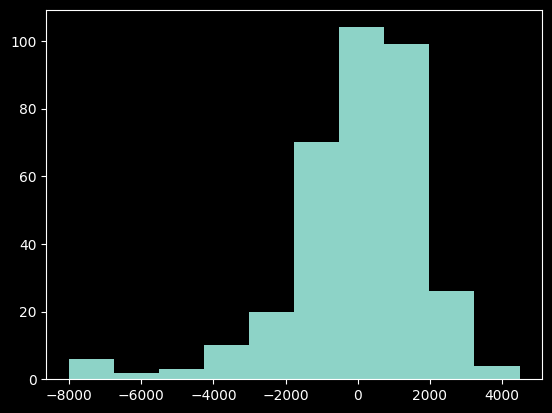

In [ ]:
plt.hist(residuals)